In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score;
from matplotlib.pyplot import figure

In [3]:
house = pd.read_csv('datasets/train.csv')

In [4]:
test = pd.read_csv('datasets/test.csv')

## Problem Statement

#### What features are most responsible for a house sale price?

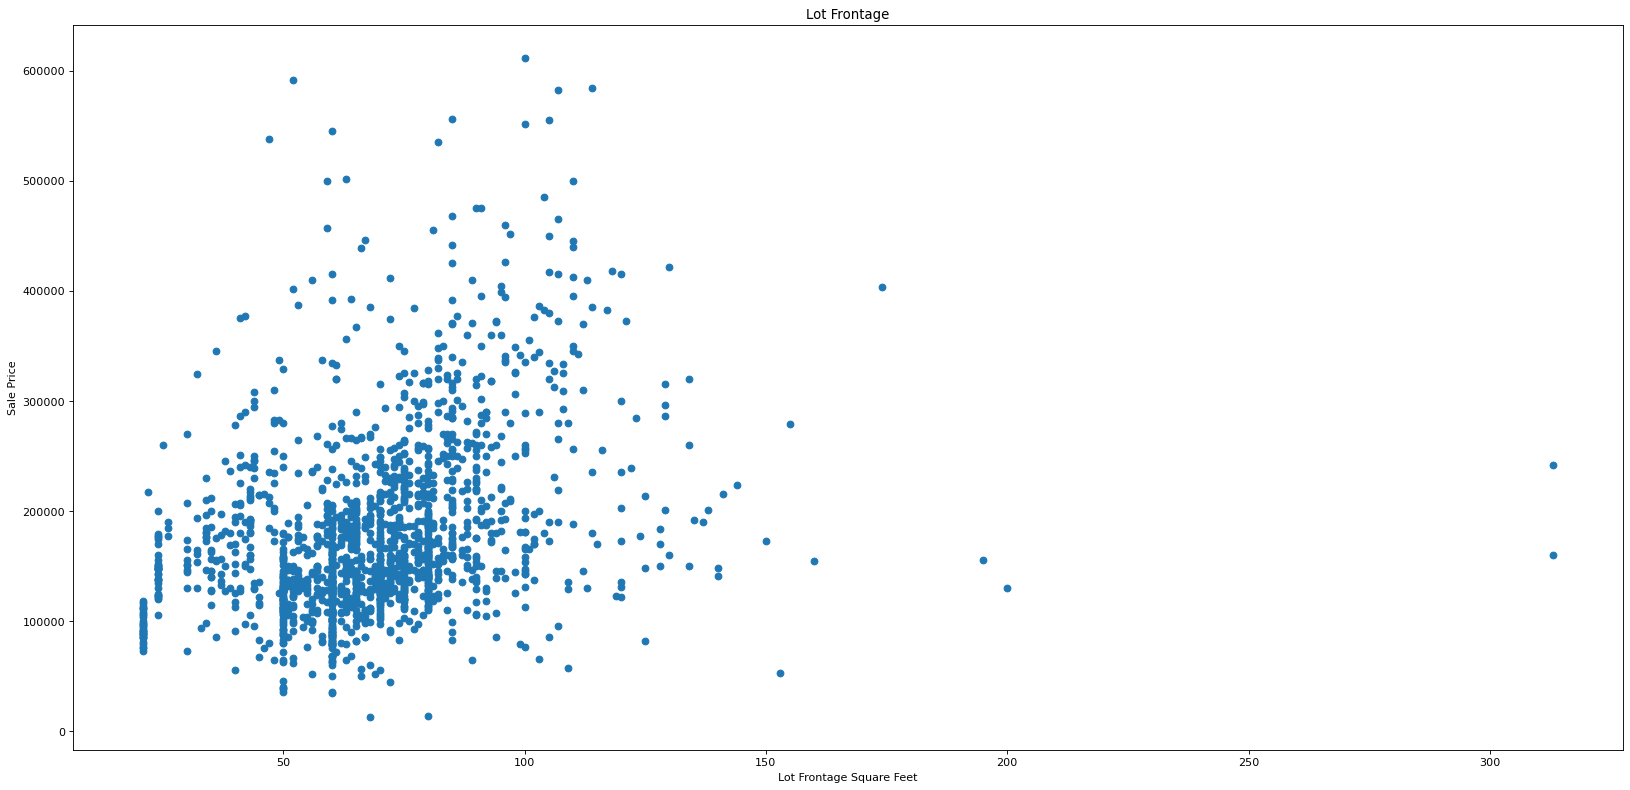

In [63]:
figure(num=None, figsize=(25, 12), dpi=80, facecolor='w', edgecolor='k') #Making line plots
plt.title('Lot Frontage');
plt.xlabel('Lot Frontage Square Feet');
plt.ylabel('Sale Price');
plt.scatter(house['Lot Frontage'], house['SalePrice'])
plt.savefig("Lotsold.jpg")

In [13]:
test.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [14]:
house.shape

(2051, 81)

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [16]:
house.isnull().sum() 

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

I dont know what these variables mean, so i looked it up and found this website (http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers)



Columns without missing values

 
    PID                0 
    MS SubClass        0   
    MS Zoning          0   
    Lot Area           0   
    Street             0   
    Lot Shape          0   
    Land Contour       0   
    Utilities          0   
    Lot Config         0   
    Land Slope         0   
    Neighborhood       0   
    Condition 1        0   
    Condition 2        0   
    Bldg Type          0   
    House Style        0   
    Overall Qual       0   
    Overall Cond       0
    Year Remod/Add     0  
    Roof Style         0   
    Roof Matl          0 
    Exterior 1st       0   
    Exterior 2nd       0   
    Exter Cond         0
    Exter Qual         0 
    Foundation         0   
    Heating            0   
    Heating QC         0   
    Central Air        0   
    Electrical         0   
    1st Flr SF         0   
    2nd Flr SF         0   
    Low Qual Fin SF    0   
    Gr Liv Area        0    
    Full Bath          0   
    Half Bath          0   
    Bedroom AbvGr      0   
    Kitchen AbvGr      0   
    Kitchen Qual       0   
    TotRms AbvGrd      0   
    Functional         0   
    Fireplaces         0   
    Paved Drive        0   
    Wood Deck SF       0   
    Open Porch SF      0   
    Enclosed Porch     0   
    3Ssn Porch         0   
    Screen Porch       0   
    Pool Area          0   
    Misc Val           0   
    Mo Sold            0   
    Yr Sold            0   
    Sale Type          0   
    SalePrice          0   

Columns with missing values 

    Lot Frontage       330 Explore, Impute
    Alley              1911 No Alley NAA
    Fireplace Qu       1000 no fireplace NFP
    Garage Type        113 No garage NG
    Garage Finish      114 No Garage NG
    Mas Vnr Type       22  No Masonry NM
    Mas Vnr Area       22 No Masonry NM

    Bsmt Qual          55  No Basement NB
    Bsmt Cond          55  No Basement NB
    Bsmt Exposure      58  No Basement NB
    BsmtFin Type 1     55 No Basement NB
    BsmtFin Type 2     56  No Basement NB

    Garage Yr Blt      114 No Garage NG
    Garage Cond        114 No garage NG
    Garage Qual        114 No garage NG
    Pool QC            2042 No pool NP
    Fence              1651 No fence NF
    Misc Feature       1986 No feature NFT

    BsmtFin SF 1       1   Remove row
    BsmtFin SF 2       1   Remove row
    Bsmt Unf SF        1   Remove row
    Total Bsmt SF      1  Remove row
    Bsmt Full Bath     2   Remove row
    Bsmt Half Bath     2  Remove row
    Garage Cars        1   Remove row
    Garage Area        1   Remove row


In [17]:
house['Lot Frontage'].isnull().sum()

330

In [18]:
#So the only column thats NA thats discrete is the Lot Frontage, so if we cheack by neighborhood, we can see if those value group somehow
house.groupby(['Lot Frontage', 'Neighborhood'], dropna=False).size()

Lot Frontage  Neighborhood
21.0          BrDale          17
              MeadowV         15
22.0          Veenker          1
24.0          Blueste          4
              BrDale           2
                              ..
NaN           SawyerW         12
              Somerst         13
              StoneBr          4
              Timber          11
              Veenker          4
Length: 661, dtype: int64

So they group a little but not by much, So the plan here is to find the median of each neighborhood and replace their null values with it

NaN

    Blmngtn         6 
    BrkSide         6 
    ClearCr         15
    CollgCr         26
    Crawfor         16
    Edwards         14
    Gilbert         3
    GrnHill         2 
    IDOTRR          5
    Landmrk         1
    MeadowV         3
    Mitchel         17
    NAmes           45
    NPkVill         1
    NWAmes          29
    NoRidge         12
    NridgHt         3
    OldTown         6
    SWISU           1
    Sawyer          40
    SawyerW         12
    Somerst         13
    StoneBr         4
    Timber          11
    Veenker         4

In [19]:
house.groupby('Neighborhood').agg({'Lot Frontage':np.median}).reset_index()
#GrnHill and Landmark only have null values

,Neighborhood,Lot Frontage
0,Blmngtn,43.0
1,Blueste,24.0
2,BrDale,21.0
3,BrkSide,51.0
4,ClearCr,82.5
5,CollgCr,70.0
6,Crawfor,64.0
7,Edwards,63.0
8,Gilbert,63.0
9,Greens,40.0


### Drop the two NA columns

In [20]:
house1 = house[(house.Neighborhood != 'GrnHill') & (house.Neighborhood != 'Landmrk')]

In [21]:
test =  test[(test.Neighborhood != 'GrnHill') & (test.Neighborhood != 'Landmrk')]

### Collecting the median values and zipping them back into the datafram

In [22]:
lot_med = house1.groupby('Neighborhood').agg({'Lot Frontage':np.median}).reset_index()

In [23]:
test_med = test.groupby('Neighborhood').agg({'Lot Frontage':np.median}).reset_index()

In [24]:
lot_med_dict = {k:v for k,v in zip(lot_med['Neighborhood'], lot_med['Lot Frontage'])}

In [25]:
test_med_dict = {k:v for k,v in zip(test_med['Neighborhood'], test_med['Lot Frontage'])}

In [26]:
lot_imputes = house1.loc[house1['Lot Frontage'].isnull()]['Neighborhood'].map(lot_med_dict)

In [27]:
test_imputes = test.loc[test['Lot Frontage'].isnull()]['Neighborhood'].map(test_med_dict)

In [28]:
house1.loc[house1['Lot Frontage'].isnull()]['Lot Frontage']=lot_imputes.values

<ipython-input-28-f8671a06b89e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house1.loc[house1['Lot Frontage'].isnull()]['Lot Frontage']=lot_imputes.values


In [29]:
test.loc[test['Lot Frontage'].isnull()]['Lot Frontage']=test_imputes.values

<ipython-input-29-4466e70623ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[test['Lot Frontage'].isnull()]['Lot Frontage']=test_imputes.values


In [30]:
house1['Lot Frontage'] = house1['Lot Frontage'].fillna(lot_imputes)

<ipython-input-30-aa41938c2627>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house1['Lot Frontage'] = house1['Lot Frontage'].fillna(lot_imputes)


In [31]:
test['Lot Frontage'] = test['Lot Frontage'].fillna(test_imputes)

### Changing the NA in catergorical features

In [32]:
house_fill = house1.fillna(value = {'Alley' : 'NAA', 'Fireplace Qu':'NFP', 'Garage Type':'NG', 'Garage Finish':'NG', 'Mas Vnr Type':'NM', 'Mas Vnr Area': 0, 'Bsmt Qual':'NB', 'Bsmt Cond':'NB', 'Bsmt Exposure':'NB', 'BsmtFin Type 1':'NB', 'BsmtFin Type 2':'NB',
                                    'Garage Yr Blt':'NG', 'Garage Cond':'NG', 'Garage Qual':'NG', 'Pool QC':'NP', 'Fence':'NF', 'Misc Feature':'NMFT'
                                    
                                   })

### Dropping the NA values which are just missing

In [33]:
house_full = house_fill.dropna()

In [34]:
test = test.dropna()

In [35]:
house_full = house_full.drop('PID', axis=1)

In [36]:
test = test.drop('PID', axis=1)

Might come back here and change a few things, but for now this seems okay

In [37]:
house_full.head(1)

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,70.0,13517,Pave,NAA,IR1,Lvl,AllPub,...,0,0,NP,NF,NMFT,0,3,2010,WD,130500


Overall Qual
Overall Cond

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

MS SubClass

       020	1-STORY 1946 & NEWER ALL STYLES 
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
    Two are ints but serve as a scale rating, one is an int but serves as an ID, so ill conver to a str

In [38]:
test.shape

(0, 79)

In [39]:
house_full.shape

(2045, 80)

In [40]:
house_full['Overall Qual'] = house_full['Overall Qual'].astype(str)

In [41]:
test['Overall Qual'] = test['Overall Qual'].astype(str)

In [42]:
house_full['Overall Cond'] = house_full['Overall Cond'].astype(str)

In [43]:
test['Overall Cond'] = test['Overall Cond'].astype(str)

In [44]:
house_full['MS SubClass'] = house_full['MS SubClass'].astype(str)

In [45]:
test['MS SubClass'] = test['MS SubClass'].astype(str)

In [46]:
house_full['Garage Yr Blt'] = house_full['Garage Yr Blt'].astype(str)

In [47]:
test['Garage Yr Blt'] = test['Garage Yr Blt'].astype(str)

In [48]:
list(house_full.select_dtypes(['object']).columns)

['MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

Columns to drop

    Sale Type, 
    Misc Feature, 
    Pool QC, 
    Garage Cond, 
    Garage Yr Blt, 
    BsmtFin Type 2, 
    Bsmt Cond
    Exter Cond, 
    Exterior 2nd, 
    Roof Style, 
    Overall Cond, 
    MS SubClass, 
    House Style, 
    Alley
    
Part two

	'Garage Finish'
	'Functional'
	'Electrical'
	'Heating'
	'BsmtFin Type 1' ##
	'Bsmt Exposure'
	'Overall Qual'

In [49]:
house_full = house_full.drop(['Sale Type',
                              'Misc Feature',
                              'Pool QC',
                              'Garage Cond',
                              'Garage Yr Blt',
                              'BsmtFin Type 2',
                              'Bsmt Cond',
                              'Exter Cond',
                              'Exterior 2nd',
                              'Roof Style',
                              'Overall Cond',
                              'MS SubClass',
                              'House Style',
                              'Alley',
                              'Garage Finish',
                              'Functional',
                              'Electrical',
                              'Heating',
                              'BsmtFin Type 1',
                              'Bsmt Exposure',
                              'Overall Qual'], axis = 1)

In [50]:
#plt.scatter(house_full['MS SubClass'], house_full['SalePrice'])

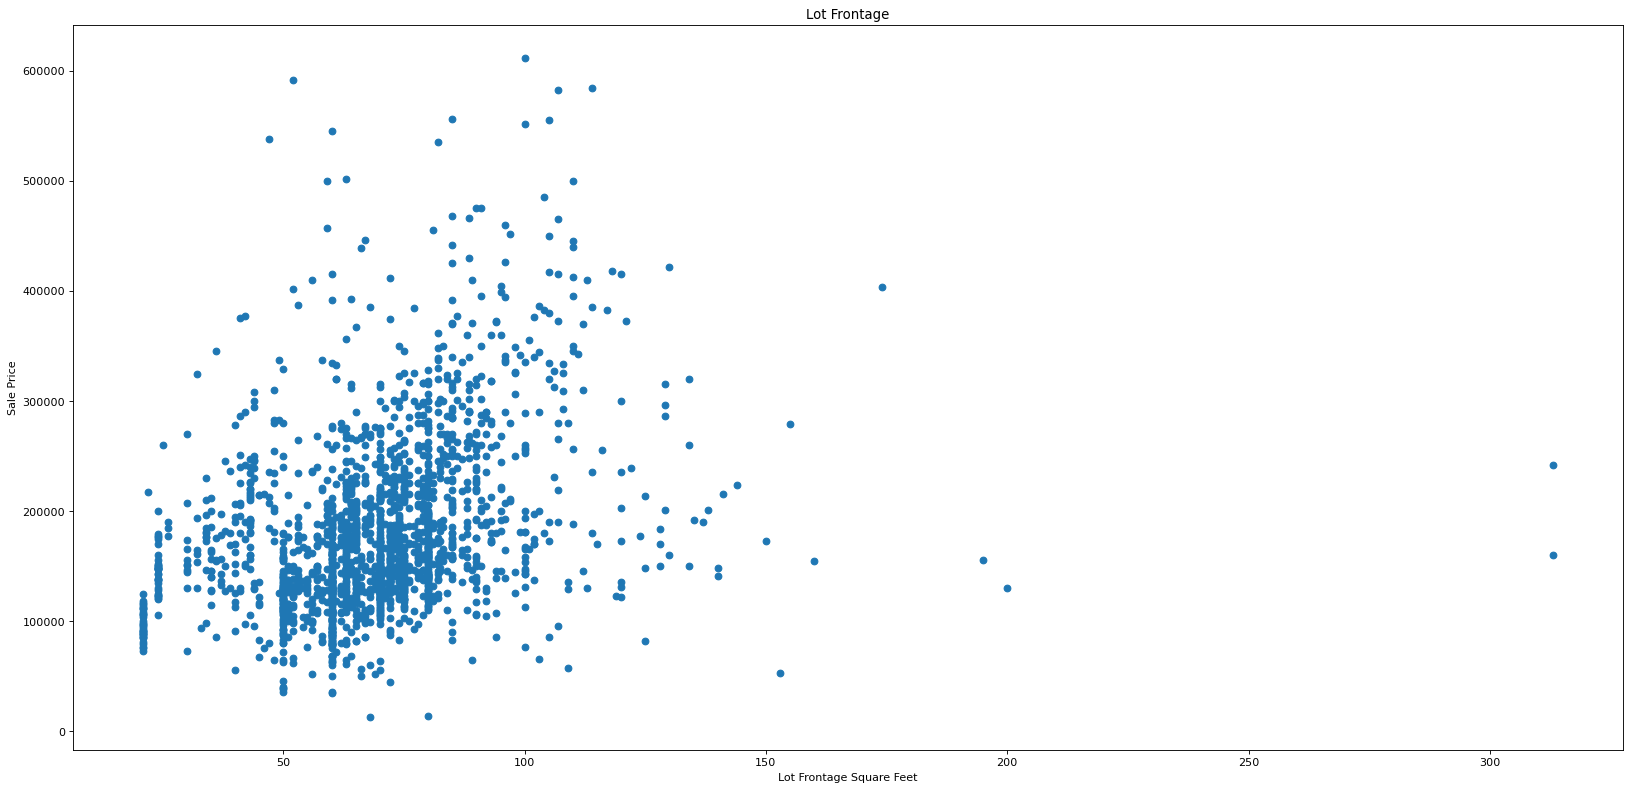

In [60]:
figure(num=None, figsize=(25, 12), dpi=80, facecolor='w', edgecolor='k') #Making line plots
plt.title('Lot Frontage');
plt.xlabel('Lot Frontage Square Feet');
plt.ylabel('Sale Price');
plt.scatter(house_full['Lot Frontage'], house_full['SalePrice'])
plt.savefig("Lotsimputed.jpg")

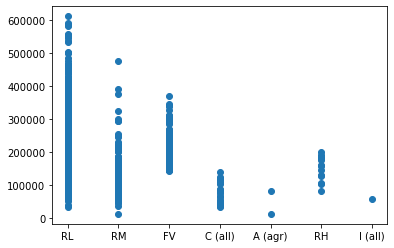

In [51]:
plt.scatter(house_full['MS Zoning'], house_full['SalePrice'])

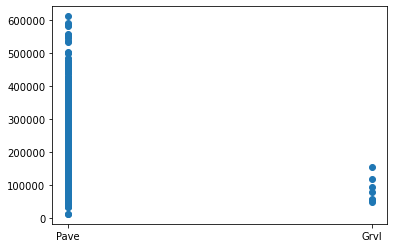

In [52]:
plt.scatter(house_full['Street'], house_full['SalePrice'])

In [53]:
#plt.scatter(house_full['Alley'], house_full['SalePrice'])

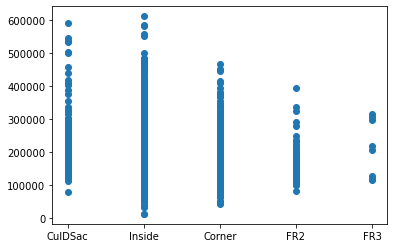

In [54]:
plt.scatter(house_full['Lot Config'], house_full['SalePrice'])

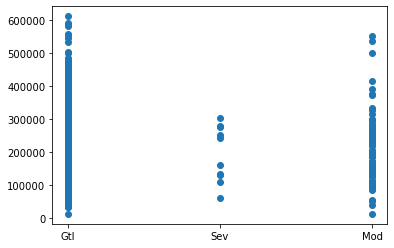

In [55]:
plt.scatter(house_full['Land Slope'], house_full['SalePrice'])

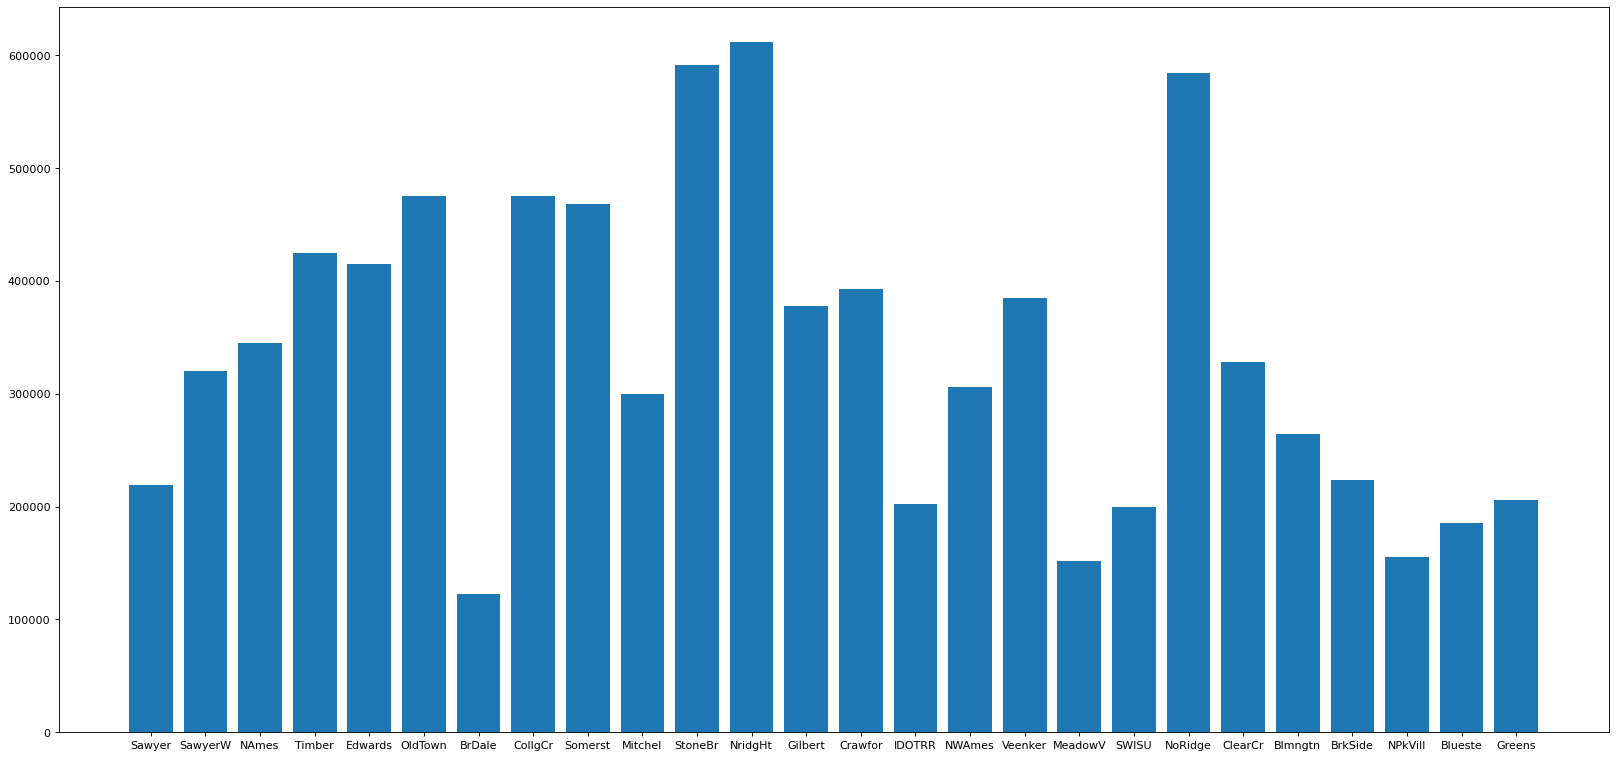

In [57]:
figure(num=None, figsize=(25, 12), dpi=80, facecolor='w', edgecolor='k') #Making line plots
plt.title('');
plt.xlabel('');
plt.ylabel('');
plt.bar(house_full['Neighborhood'], house_full['SalePrice'])
plt.savefig("Neighborhoods.jpg")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

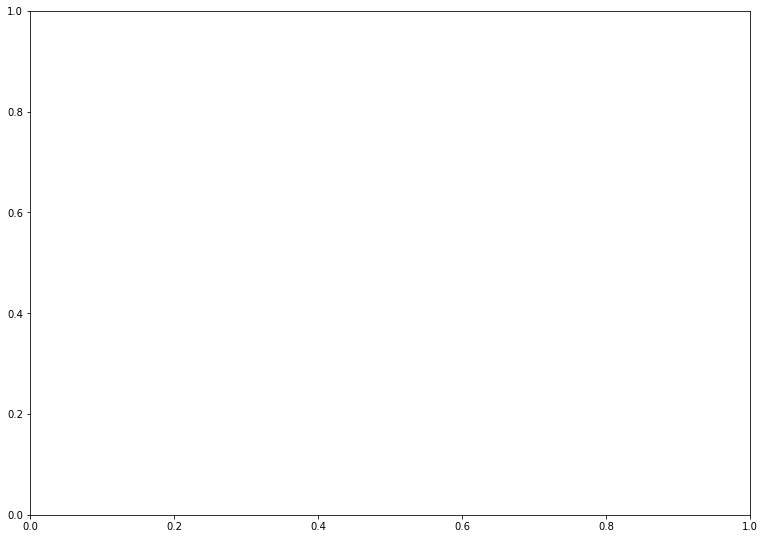

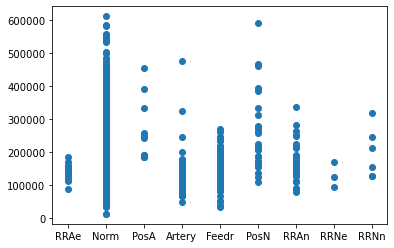

In [48]:
plt.scatter(house_full['Condition '], house_full['SalePrice'])

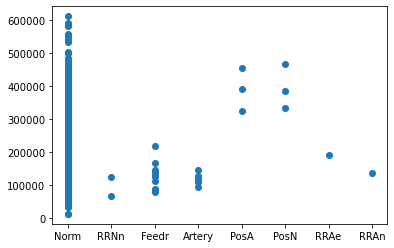

In [49]:
plt.scatter(house_full['Condition 2'], house_full['SalePrice'])

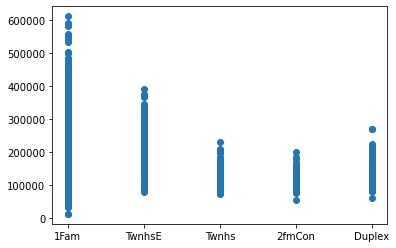

In [50]:
plt.scatter(house_full['Bldg Type'], house_full['SalePrice'])

In [51]:
#plt.scatter(house_full['House Style'], house_full['SalePrice'])

In [52]:
#plt.scatter(house_full['Overall Qual'], house_full['SalePrice'])

In [53]:
#plt.scatter(house_full['Overall Cond'], house_full['SalePrice'])

In [54]:
#plt.scatter(house_full['Roof Style'], house_full['SalePrice'])

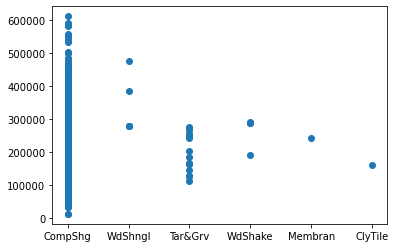

In [55]:
plt.scatter(house_full['Roof Matl'], house_full['SalePrice'])

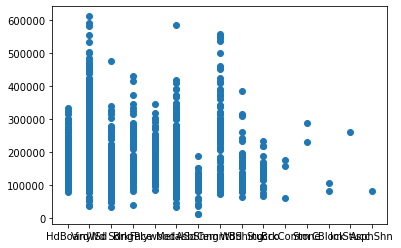

In [56]:
plt.scatter(house_full['Exterior 1st'], house_full['SalePrice'])

In [57]:
#plt.scatter(house_full['Exterior 2nd'], house_full['SalePrice'])

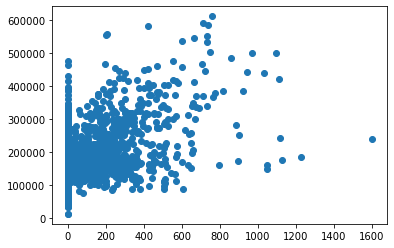

In [58]:
plt.scatter(house_full['Mas Vnr Area'], house_full['SalePrice'])

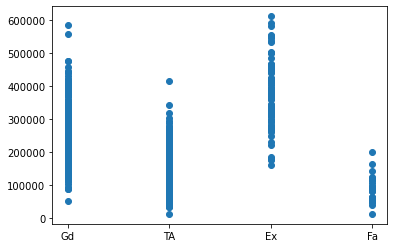

In [59]:
plt.scatter(house_full['Exter Qual'], house_full['SalePrice'])

In [60]:
#plt.scatter(house_full['Exter Cond'], house_full['SalePrice'])

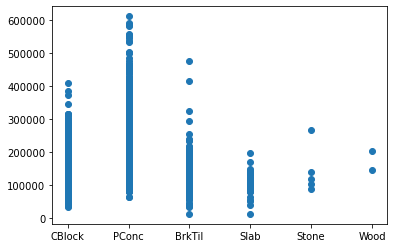

In [61]:
plt.scatter(house_full['Foundation'], house_full['SalePrice'])

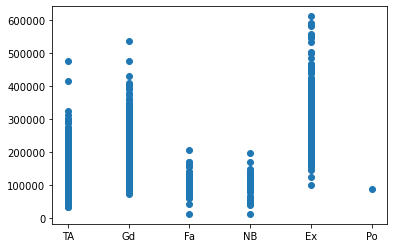

In [62]:
plt.scatter(house_full['Bsmt Qual'], house_full['SalePrice'])

In [63]:
#plt.scatter(house_full['Bsmt Cond'], house_full['SalePrice'])

In [64]:
#plt.scatter(house_full['Bsmt Exposure'], house_full['SalePrice'])

In [65]:
#plt.scatter(house_full['BsmtFin Type 1'], house_full['SalePrice'])

In [66]:
#plt.scatter(house_full['BsmtFin Type 2'], house_full['SalePrice'])

In [67]:
#plt.scatter(house_full['Heating'], house_full['SalePrice'])

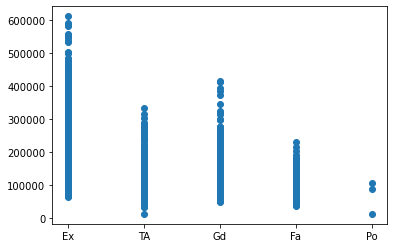

In [68]:
plt.scatter(house_full['Heating QC'], house_full['SalePrice'])

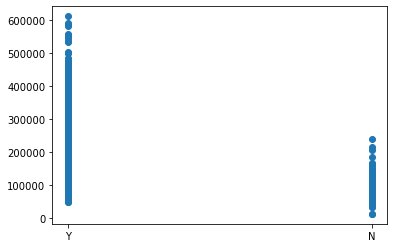

In [69]:
plt.scatter(house_full['Central Air'], house_full['SalePrice'])

In [70]:
#plt.scatter(house_full['Electrical'], house_full['SalePrice'])

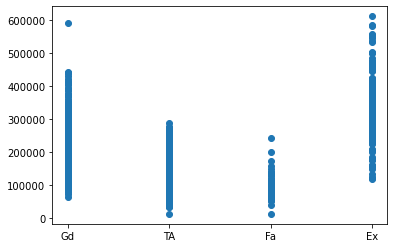

In [71]:
plt.scatter(house_full['Kitchen Qual'], house_full['SalePrice'])

In [72]:
#plt.scatter(house_full['Functional'], house_full['SalePrice'])

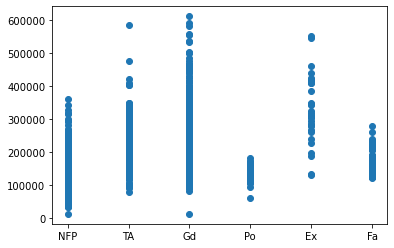

In [73]:
plt.scatter(house_full['Fireplace Qu'], house_full['SalePrice'])

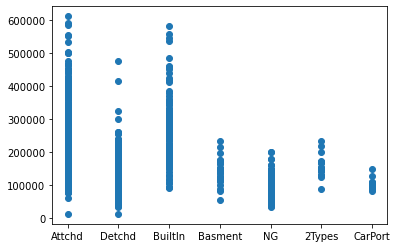

In [74]:
plt.scatter(house_full['Garage Type'], house_full['SalePrice'])

In [75]:
#plt.scatter(house_full['Garage Yr Blt'], house_full['SalePrice'])

In [76]:
#plt.scatter(house_full['Garage Finish'], house_full['SalePrice'])

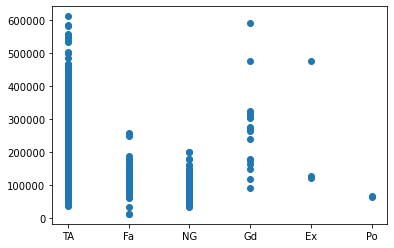

In [77]:
plt.scatter(house_full['Garage Qual'], house_full['SalePrice'])

In [78]:
#plt.scatter(house_full['Garage Cond'], house_full['SalePrice'])

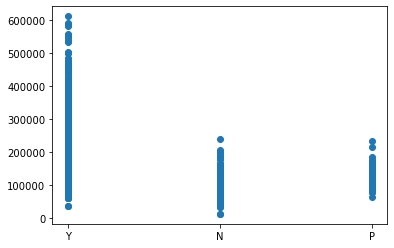

In [79]:
plt.scatter(house_full['Paved Drive'], house_full['SalePrice'])

In [80]:
#plt.scatter(house_full['Pool QC'], house_full['SalePrice'])

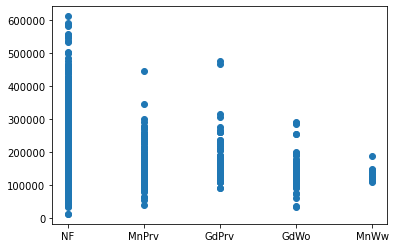

In [81]:
plt.scatter(house_full['Fence'], house_full['SalePrice'])

In [82]:
#plt.scatter(house_full['Misc Feature'], house_full['SalePrice'])

In [83]:
#plt.scatter(house_full['Sale Type'], house_full['SalePrice'])

In [84]:
list(test.select_dtypes(['int64']).columns)

['Id',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

Deciding to get rid of these discrete values

    Mo Sold, 
    Pool Area, 
    Misc Feature/Val, 
    Screen Porch, 
    3Ssn Prch, 
    Enclosed Porch, 
    Open Porch SF, 
    Garage Cars,
    Bedroom AbvGr, 
    Low Qual Fin SF
    
Part two

	'Year Remod/Add'
	'Lot Area'
	'Fireplaces'
	'1st Flr SF'
	'2nd Flr SF'

In [85]:
house_full = house_full.drop(['Mo Sold',
                              'Pool Area',
                              'Misc Val',
                              'Screen Porch',
                              '3Ssn Porch',
                              'Enclosed Porch',
                              'Open Porch SF',
                              'Garage Cars',
                              'Bedroom AbvGr',
                              'Low Qual Fin SF',
                              'Bsmt Unf SF',
                              'Year Remod/Add',
                              'Lot Area',
                              'Fireplaces',
                              '1st Flr SF',
                              '2nd Flr SF',
                             ], axis = 1) 

In [86]:
test.shape

(0, 79)

In [87]:
house_full.shape

(2045, 43)

In [88]:
#plt.scatter(house_full['Bsmt Unf SF'], house_full['SalePrice'])

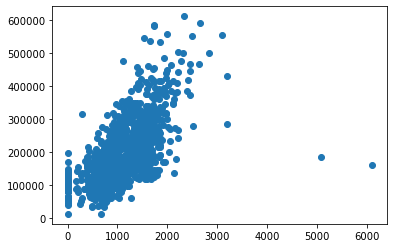

In [89]:
plt.scatter(house_full['Total Bsmt SF'], house_full['SalePrice'])

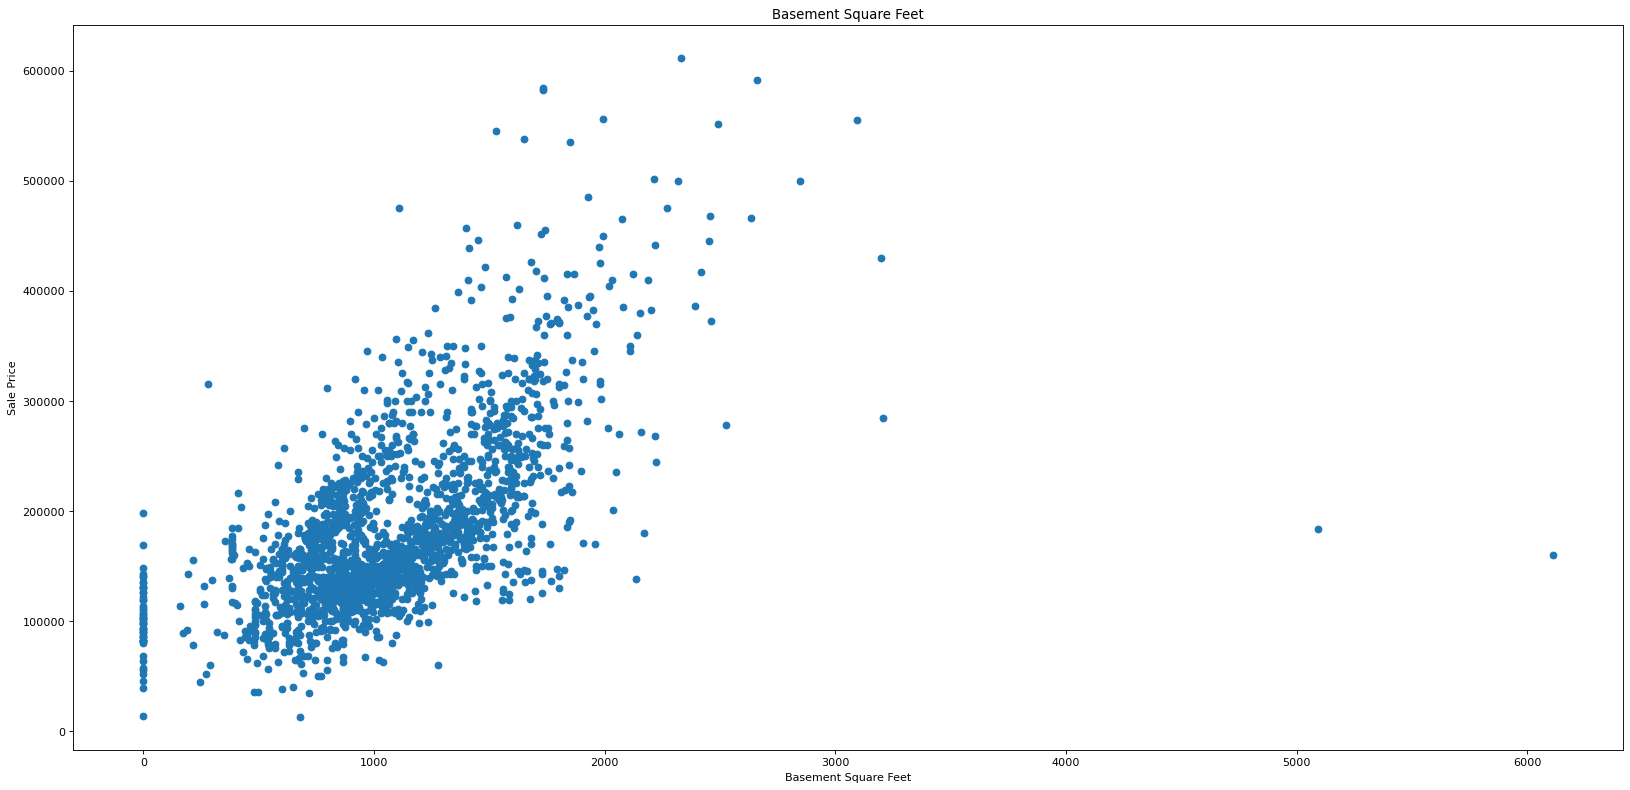

In [67]:
figure(num=None, figsize=(25, 12), dpi=80, facecolor='w', edgecolor='k') #Making line plots
plt.title('Basement Square Feet');
plt.xlabel('Basement Square Feet');
plt.ylabel('Sale Price');
plt.scatter(house_full['Total Bsmt SF'], house_full['SalePrice'])
plt.savefig("TBSF.jpg")

In [90]:
#plt.scatter(house_full['1st Flr SF'], house_full['SalePrice'])

In [91]:
#plt.scatter(house_full['2nd Flr SF'], house_full['SalePrice'])

In [92]:
#plt.scatter(house_full['Low Qual Fin SF'], house_full['SalePrice'])

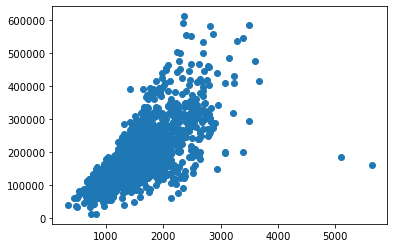

In [93]:
plt.scatter(house_full['Gr Liv Area'], house_full['SalePrice'])

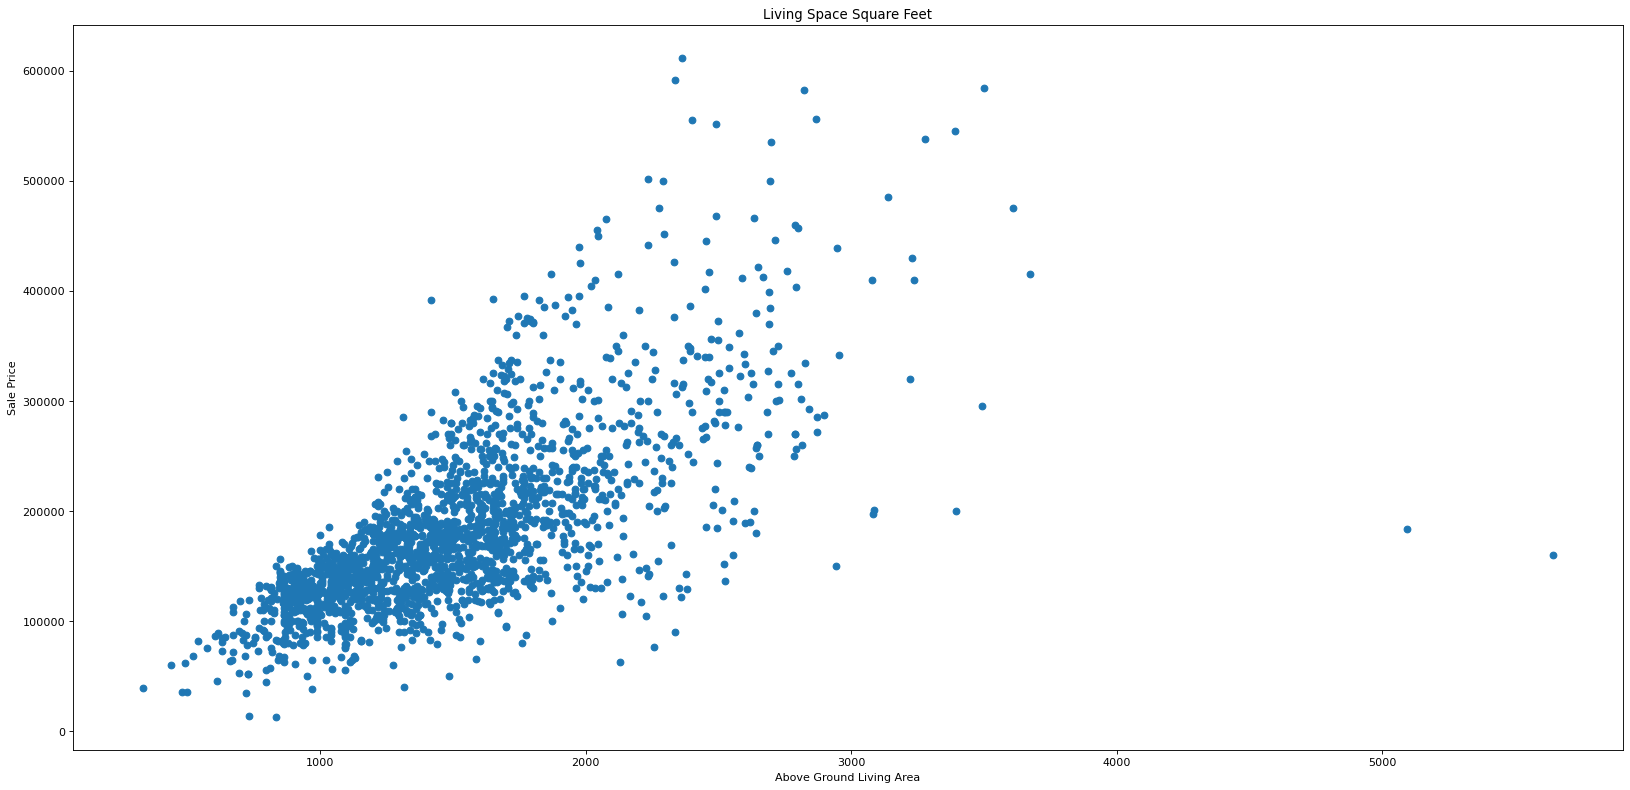

In [66]:
figure(num=None, figsize=(25, 12), dpi=80, facecolor='w', edgecolor='k') #Making line plots
plt.title('Living Space Square Feet');
plt.xlabel('Above Ground Living Area');
plt.ylabel('Sale Price');
plt.scatter(house_full['Gr Liv Area'], house_full['SalePrice'])
plt.savefig("LSSF.jpg")

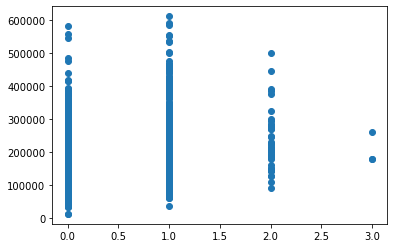

In [94]:
plt.scatter(house_full['Bsmt Full Bath']+house_full['Bsmt Half Bath'], house_full['SalePrice'])

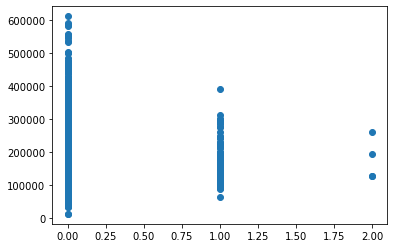

In [95]:
plt.scatter(house_full['Bsmt Half Bath'], house_full['SalePrice'])

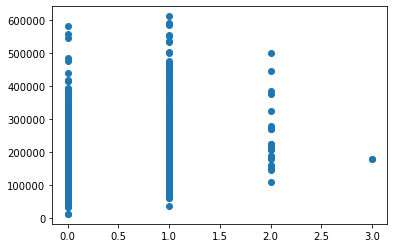

In [96]:
plt.scatter(house_full['Bsmt Full Bath'], house_full['SalePrice'])

<BarContainer object of 2045 artists>

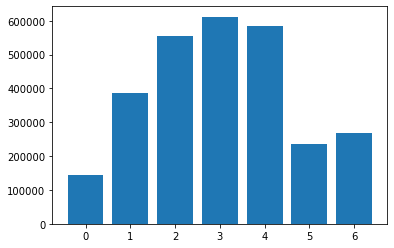

In [97]:
plt.bar(house_full['Half Bath']+house_full['Full Bath'], house_full['SalePrice'])

<BarContainer object of 2045 artists>

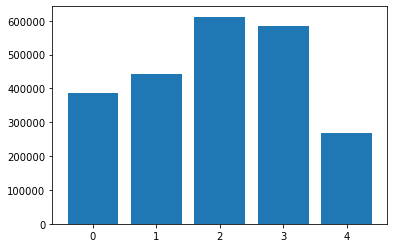

In [98]:
plt.bar(house_full['Full Bath'], house_full['SalePrice'])

<BarContainer object of 2045 artists>

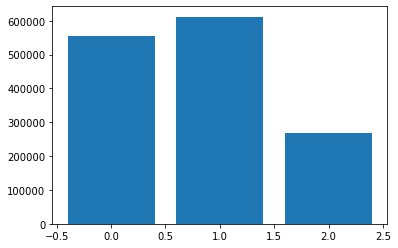

In [99]:
plt.bar(house_full['Half Bath'], house_full['SalePrice'])

In [100]:
#plt.scatter(house_full['Bedroom AbvGr'], house_full['SalePrice'])

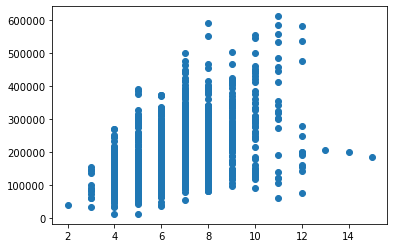

In [101]:
plt.scatter(house_full['TotRms AbvGrd'], house_full['SalePrice'])

In [102]:
#plt.scatter(house_full['Fireplaces'], house_full['SalePrice']) ######################

In [103]:
#plt.scatter(house_full['Garage Cars'], house_full['SalePrice'])

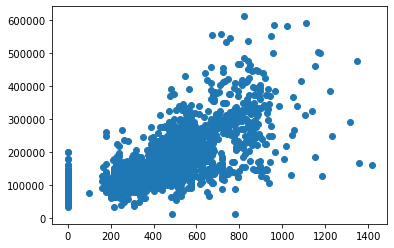

In [104]:
plt.scatter(house_full['Garage Area'], house_full['SalePrice'])

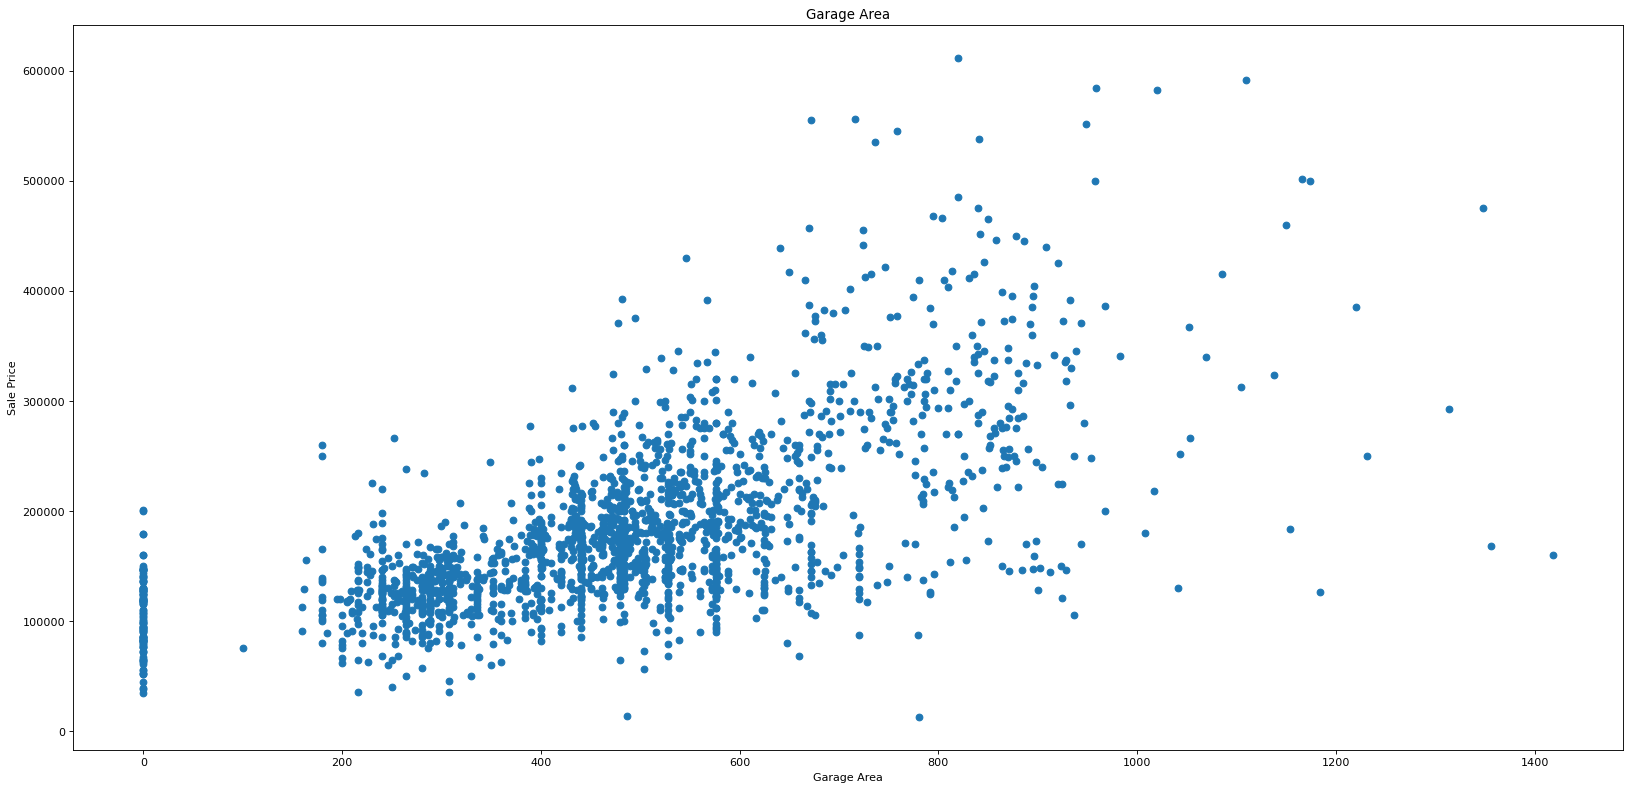

In [65]:
figure(num=None, figsize=(25, 12), dpi=80, facecolor='w', edgecolor='k') #Making line plots
plt.title('Garage Area');
plt.xlabel('Garage Area');
plt.ylabel('Sale Price');
plt.scatter(house_full['Garage Area'], house_full['SalePrice'])
plt.savefig("Garage Area.jpg")

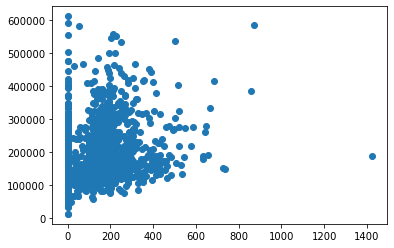

In [105]:
plt.scatter(house_full['Wood Deck SF'], house_full['SalePrice'])

In [106]:
#plt.scatter(house_full['Open Porch SF'], house_full['SalePrice'])

In [107]:
#plt.scatter(house_full['Enclosed Porch'], house_full['SalePrice'])

In [108]:
#plt.scatter(house_full['3Ssn Porch'], house_full['SalePrice'])

In [109]:
#plt.scatter(house_full['Screen Porch'], house_full['SalePrice'])

In [110]:
#plt.scatter(house_full['Misc Val'], house_full['SalePrice'])

In [111]:
#plt.scatter(house_full['Pool Area'], house_full['SalePrice'])

In [112]:
#plt.scatter(house_full['MS SubClass'], house_full['SalePrice'])

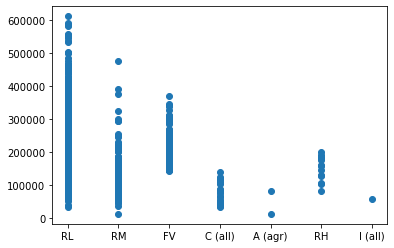

In [113]:
plt.scatter(house_full['MS Zoning'], house_full['SalePrice'])

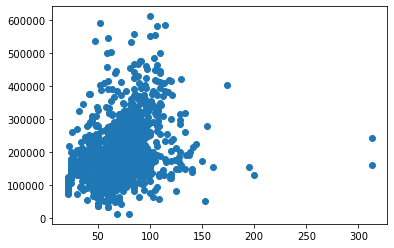

In [114]:
plt.scatter(house_full['Lot Frontage'], house_full['SalePrice'])

In [115]:
#plt.scatter(house_full['Lot Area'], house_full['SalePrice'])

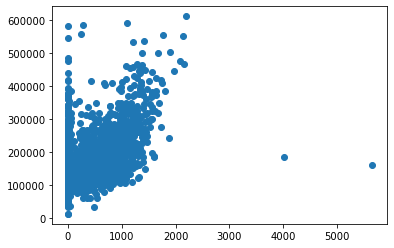

In [116]:
plt.scatter(house_full['BsmtFin SF 1'], house_full['SalePrice'])

In [117]:
#plt.scatter(house_full['Bsmt Unf SF'], house_full['SalePrice'])

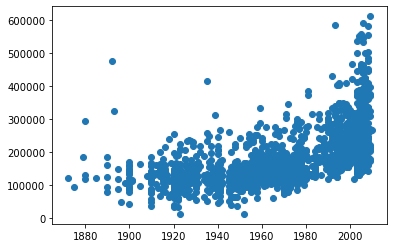

In [118]:
plt.scatter(house_full['Year Built'], house_full['SalePrice'])

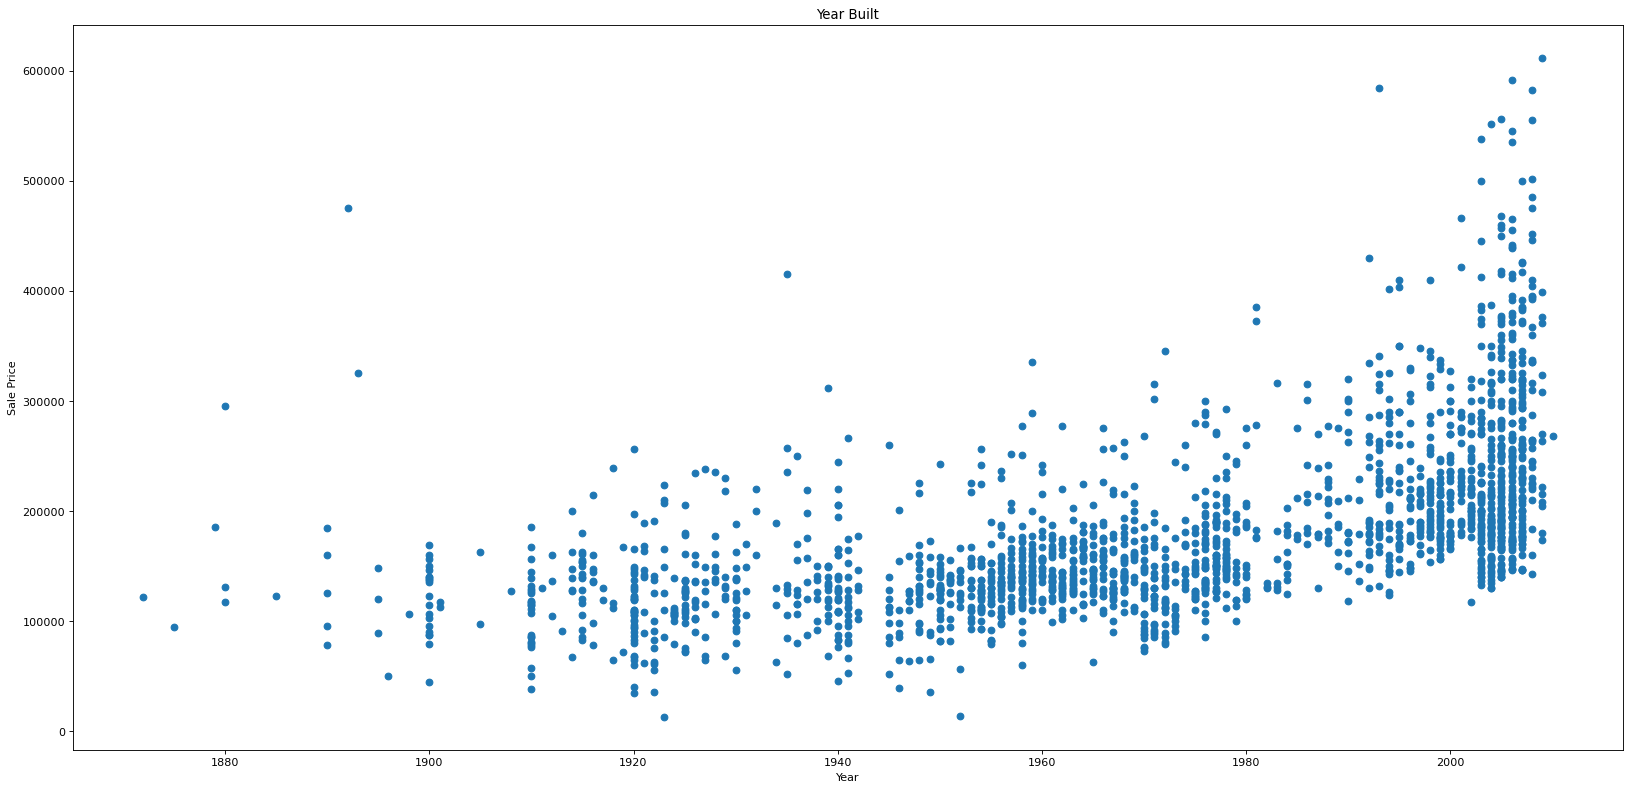

In [64]:
figure(num=None, figsize=(25, 12), dpi=80, facecolor='w', edgecolor='k') #Making line plots
plt.title('Year Built');
plt.xlabel('Year');
plt.ylabel('Sale Price');
plt.scatter(house_full['Year Built'], house_full['SalePrice'])
plt.savefig("YearBuilt.jpg")

In [119]:
#plt.scatter(house_full['Year Remod/Add'], house_full['SalePrice'])

In [120]:
house_full.to_csv('trainclean.csv', index=False)

In [122]:
house_full.shape

(2045, 43)

## Deciding on Outliers

### I decided not to touch the outliers, since they exist in the real world, this will hurt my score but will give a realistic one.

## What features to combine

### I feel like combining the bathrooms to just above ground and below ground would be good.